In [1]:
pkg load image;

In [2]:
function show_demo(f, p, p1, p2, p12, p13, savename)
    subplot(2,3,1);
    imshow(uint8(f));
    title('original');
    
    
    subplot(2,3,2);
    imshow(uint8(p));
    title('dilatacion');
    
    
    subplot(2,3,3);
    imshow(uint8(p1));
    title('erosion');
    
    
    subplot(2,3,4);
    imshow(uint8(p12));
    title('apertura');
    
    
    subplot(2,3,5);
    imshow(uint8(p13));
    title('clausura');
    
    saveas(1, savename, "png")
end

In [3]:
function [f, p, p1, p2, p12, p13] = demo(image)

    f=double(image);
    [x,y]=size(f);
    p=zeros(x,y);p2=zeros(x,y);p12=zeros(x,y);p13=zeros(x,y);
    
    w=[1 1 1; 1 1 1; 1 1 1];

    %dilatacion
    
    
    for s=2:x-2
        for t=2:y-2
            w1=[f(s-1,t-1)*w(1) f(s-1,t)*w(2) f(s-1,t+1)*w(3) f(s,t-1)*w(4) f(s,t)*w(5) f(s,t+1)*w(6) f(s+1,t-1)*w(7) f(s+1,t)*w(8) f(s+1,t+1)*w(9)];
            p(s,t)=max(w1);
        end
    end

    %erosion
    
    for s=2:x-1
        for t=2:y-1
            w12=[f(s-1,t-1)*w(1) f(s-1,t)*w(2) f(s-1,t+1)*w(3) f(s,t-1)*w(4) f(s,t)*w(5) f(s,t+1)*w(6) f(s+1,t-1)*w(7) f(s+1,t)*w(8) f(s+1,t+1)*w(9)];
            p1(s,t)=min(w12);
        end
    end

    %apertura
    
    [m,n]=size(p);
    
    for s=2:m-1
        for t=2:n-1
            w13=[p(s-1,t-1)*w(1) p(s-1,t)*w(2) p(s-1,t+1)*w(3) p(s,t-1)*w(4) p(s,t)*w(5) p(s,t+1)*w(6) p(s+1,t-1)*w(7) p(s+1,t)*w(8) p(s+1,t+1)*w(9)];
            p12(s,t)=min(w13);
        end
    end

    %clausura

    [r,c]=size(p1);
    
    for s=2:r-1
        for t=2:c-1
            w14=[p1(s-1,t-1)*w(1) p1(s-1,t)*w(2) p1(s-1,t+1)*w(3) p1(s,t-1)*w(4) p1(s,t)*w(5) p1(s,t+1)*w(6) p1(s+1,t-1)*w(7) p1(s+1,t)*w(8) p1(s+1,t+1)*w(9)];
            p13(s,t)=min(w14);
        end
    end
end

In [14]:
coins = uint8(imread("../images/coins.png"));
[f, p, p1, p2, p12, p13] = demo(coins);

DEBUG: FC_WEIGHT didn't match


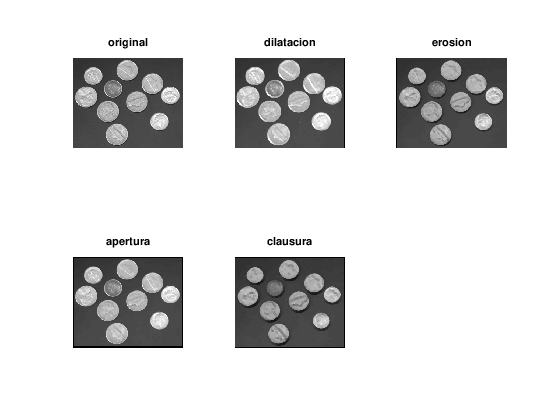

In [15]:
show_demo(f, p, p1, p2, p12, p13, "procs-coins");

In [16]:
F=imread('cells.jpg');
F_gray = uint8(rgb2gray(F));

In [7]:
[f, p, p1, p2, p12, p13] = demo(F_gray);

DEBUG: FC_WEIGHT didn't match


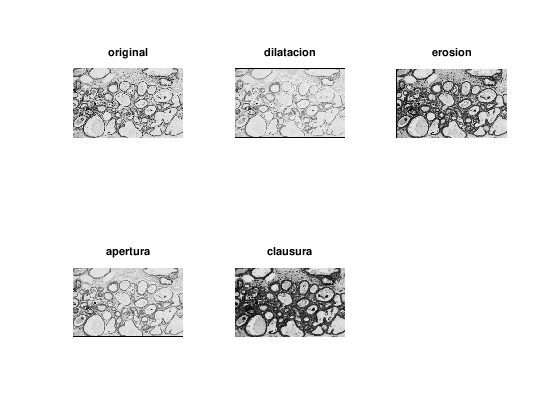

In [8]:
show_demo(f, p, p1, p2, p12, p13, "procs-cells-gray");

In [9]:
tmp = []

for i=[1:3]
    F_i = uint8(F(:,:,i));
    [f, p, p1, p2, p12, p13] = demo(F_i);
    
end

tmp = [](0x0)
